In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')
sns.set(style='white', context='notebook', palette='deep')
%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df.shape

(1460, 81)

In [4]:
test_df.shape

(1459, 80)

In [5]:
# check numbers of samples and features
print("Size of train data before dropping Id feature: {}".format(train_df.shape))
print("Size of test data before dropping Id feature: {}".format(test_df.shape))

Size of train data before dropping Id feature: (1460, 81)
Size of test data before dropping Id feature: (1459, 80)


In [6]:
# saving the 'Id'column
train_id= train_df['Id']
test_id= test_df['Id']

#droping 'Id' column as it is unnecessary for the prediction
train_df.drop('Id', axis=1,inplace= True)
test_df.drop('Id', axis=1, inplace= True)

In [7]:
print('Size of train data after dropping Id feature: {}'.format(train_df.shape))
print('Size of test data after dropping Id feature: {}'.format(test_df.shape))

Size of train data after dropping Id feature: (1460, 80)
Size of test data after dropping Id feature: (1459, 79)


In [8]:
# selecting int data type columns
train_df = train_df[['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice']]

test_df=test_df[['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF']]

In [9]:
train_df.head()

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
0,65.0,7,2003,2003,196.0,706,856,856,854,1710,2,8,0,2003.0,2,548,0,61,208500
1,80.0,6,1976,1976,0.0,978,1262,1262,0,1262,2,6,1,1976.0,2,460,298,0,181500
2,68.0,7,2001,2002,162.0,486,920,920,866,1786,2,6,1,2001.0,2,608,0,42,223500
3,60.0,7,1915,1970,0.0,216,756,961,756,1717,1,7,1,1998.0,3,642,0,35,140000
4,84.0,8,2000,2000,350.0,655,1145,1145,1053,2198,2,9,1,2000.0,3,836,192,84,250000


In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   OverallQual   1460 non-null   int64  
 2   YearBuilt     1460 non-null   int64  
 3   YearRemodAdd  1460 non-null   int64  
 4   MasVnrArea    1452 non-null   float64
 5   BsmtFinSF1    1460 non-null   int64  
 6   TotalBsmtSF   1460 non-null   int64  
 7   1stFlrSF      1460 non-null   int64  
 8   2ndFlrSF      1460 non-null   int64  
 9   GrLivArea     1460 non-null   int64  
 10  FullBath      1460 non-null   int64  
 11  TotRmsAbvGrd  1460 non-null   int64  
 12  Fireplaces    1460 non-null   int64  
 13  GarageYrBlt   1379 non-null   float64
 14  GarageCars    1460 non-null   int64  
 15  GarageArea    1460 non-null   int64  
 16  WoodDeckSF    1460 non-null   int64  
 17  OpenPorchSF   1460 non-null   int64  
 18  SalePrice     1460 non-null 

In [11]:
test_df.head()

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF
0,80.0,5,1961,1961,0.0,468.0,882.0,896,0,896,1,5,0,1961.0,1.0,730.0,140,0
1,81.0,6,1958,1958,108.0,923.0,1329.0,1329,0,1329,1,6,0,1958.0,1.0,312.0,393,36
2,74.0,5,1997,1998,0.0,791.0,928.0,928,701,1629,2,6,1,1997.0,2.0,482.0,212,34
3,78.0,6,1998,1998,20.0,602.0,926.0,926,678,1604,2,7,1,1998.0,2.0,470.0,360,36
4,43.0,8,1992,1992,0.0,263.0,1280.0,1280,0,1280,2,5,0,1992.0,2.0,506.0,0,82


In [12]:
# getting description
train_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

##### Average house price is $180921

In [13]:
#most correlated features with the price
corrmat=train_df.corr()
k=10
sale_cols= corrmat.nlargest(k,'SalePrice')['SalePrice'].index
corr_feat= pd.DataFrame(sale_cols)
corr_feat.columns= ['Most Correlated Features']

corr_feat

,Most Correlated Features
0,SalePrice
1,OverallQual
2,GrLivArea
3,GarageCars
4,GarageArea
5,TotalBsmtSF
6,1stFlrSF
7,FullBath
8,TotRmsAbvGrd
9,YearBuilt


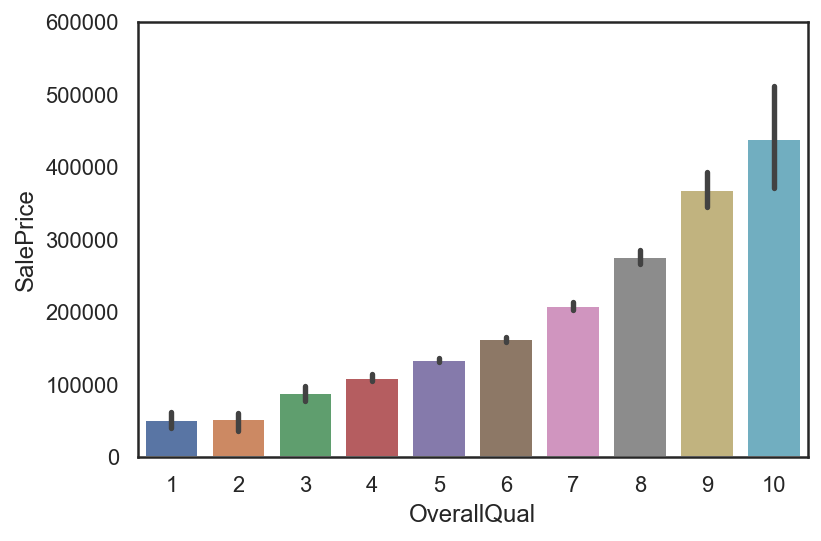

In [20]:
fig=sns.barplot(x=train_df['OverallQual'],y=train_df['SalePrice'])
fig.axis(ymin=0, ymax=600000);

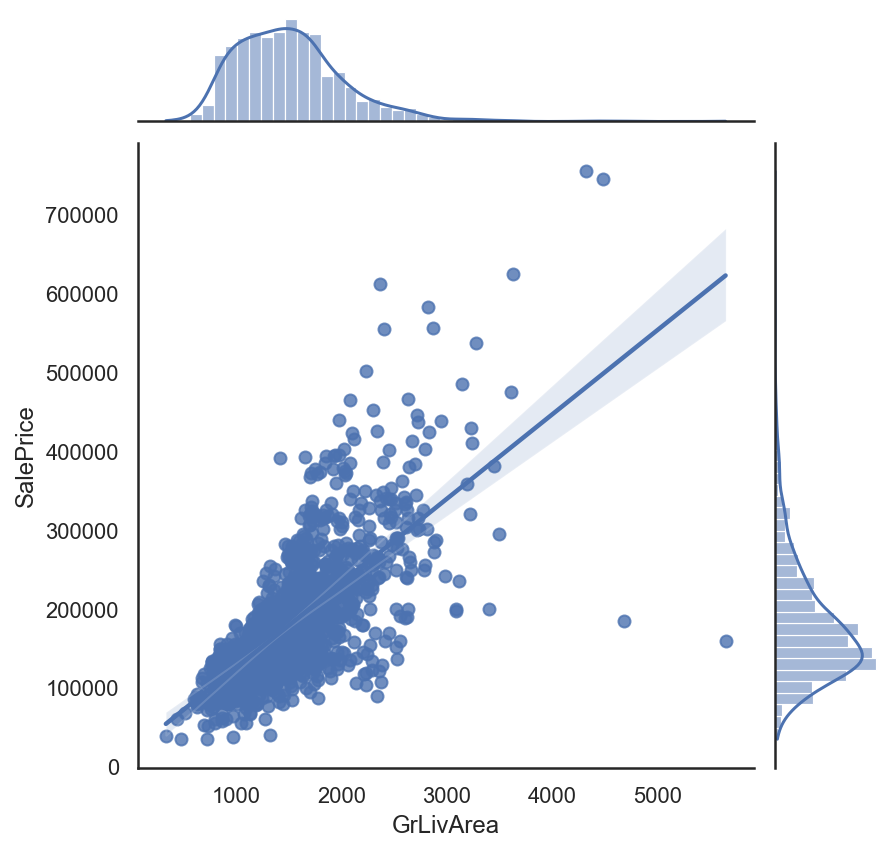

In [15]:
sns.jointplot(x=train_df['GrLivArea'],y=train_df['SalePrice'],kind='reg')

In above correlation, there are two data points tells that people will pay less for large living area(area square feet). 

These are the outliers as it is not making sense so we will drop it.

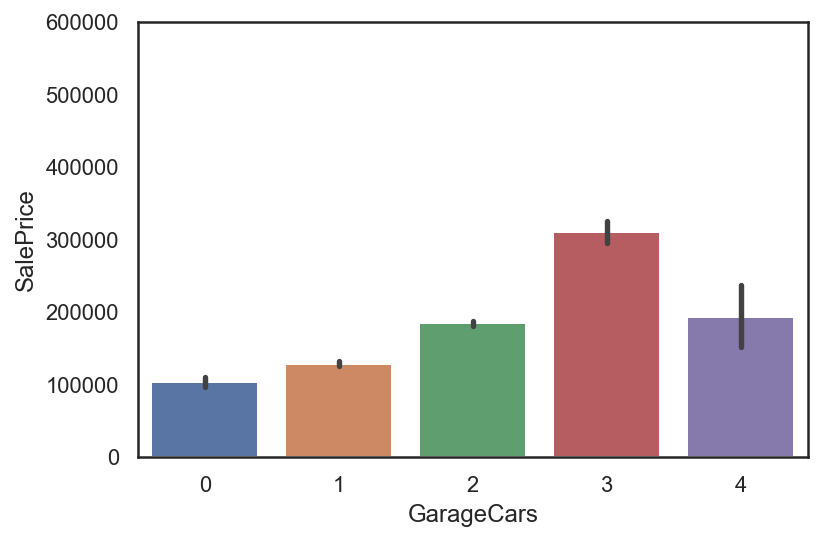

In [19]:
fig=sns.barplot(x=train_df['GarageCars'], y=train_df['SalePrice'])
fig.axis(ymin=0, ymax=600000);

In this correlation, Sale price with 4 garage cars is less than the sale price with three other garage cars. 

Therefore, it will be removed since it is an outlier as it is not making any sense to this correlation.

In [21]:
train_df1= train_df.drop(train_df[(train_df['GarageCars']>3)&(train_df['SalePrice']<300000)].index).reset_index(drop=True)

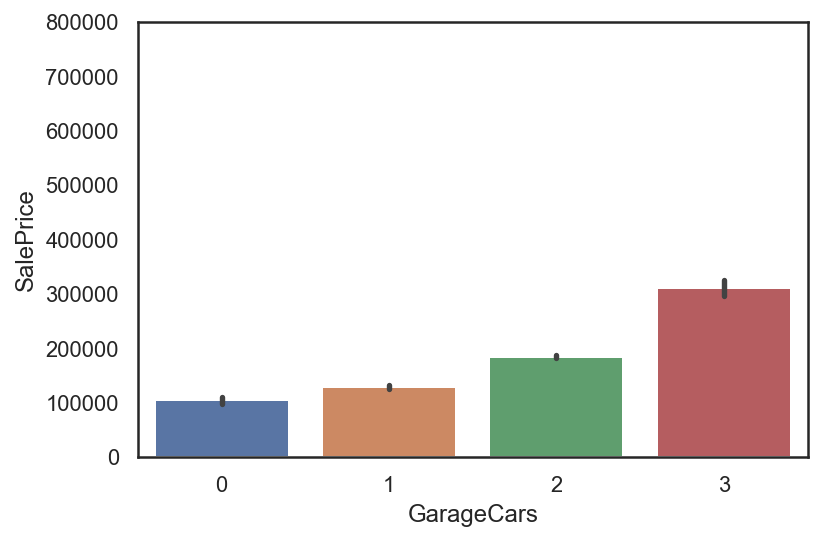

In [22]:
fig=sns.barplot(x=train_df1['GarageCars'], y=train_df1['SalePrice'])
fig.axis(ymin=0, ymax=800000);

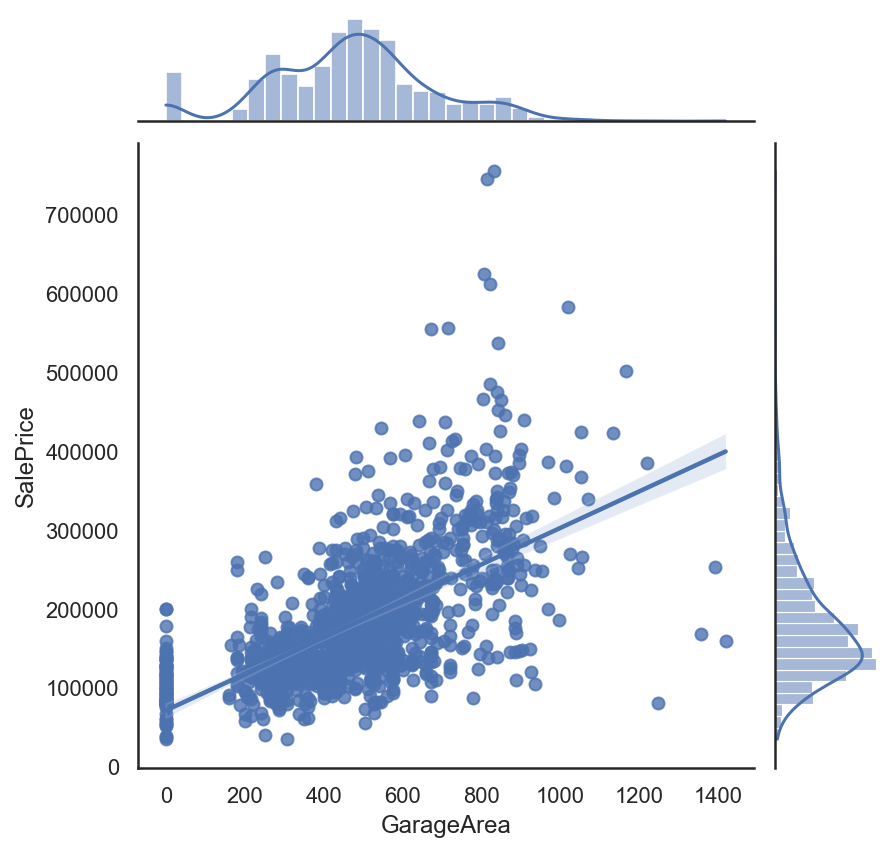

In [23]:
sns.jointplot(x=train_df['GarageArea'],y=train_df['SalePrice'],kind='reg')